# 感知机（Perception）

定义（感知机）：假设输入空间（特征空间）是 $\Chi \subset R^n$，输出空间是 $y = \{+1, -1\} $。输入 $x \in \Chi$ 表示实例的特征向量，对应于输出空间（特征空间）的点；输出 $ y \in Y$表述实例的类别。由输入空间到输出空间的如下函数，

$$
f(x) = sign(w · x + b)
$$
称为 $\textbf{感知机}$。

## 感知机学习策略
感知机是分类模型，对于高维的数据，它希望通过数据训练出表示超平面的参数$w$和$b$，找到一个超平面将线性可分的数据分开。训练数据需要定义所谓的损失函数，并将这个损失函数极小化。基本上，所有目前主流的机器学习算法都遵循这个流程。
感知机的损失函数定义为：
$$
L(w, b) = -\sum_{x_i \in M} y_i(w · x_i + b)
$$
也就是对所有错分的点，用标签乘以其到超平面的距离（乘积一定小于0）求和。
损失函数也可以改为对所有样本的求和，注意到，对正确的样本，其感知机预测标签和训练集标签的差为0，可定义：
$$
L(w, b) = -\sum_{x_i \in T} (y_i - d_i)(w·x_i +b)
$$
其中$d_i$表示感知机预测标签。
## 感知机学习算法
最优化问题：
对给定的训练数据集
$$
T = \{ (x_1, y_1), (x_2, y_2) \dots (x_n, y_n)\}
$$
其中，$x_i \in \Chi = R^n$, $y_i = Y = \{+1, -1\}$，$i = 1, 2 \dots n$，求参数$w$，$b$，使其为以下损失函数极小化问题的解
$$
\underset{w, b}{\min} L(w, b) = -\sum_{x_i \in M} y_i(w \cdot x_i + b)
$$
其中$M$为误分类点的集合。

此外，为了方便代码，会把需要训练的参数放入到一个矩阵中，即 $\tilde{w} = {b, w}$，把输入添加一个固定的1，$\tilde{x} = {1, x}$，对每个样本的估分就成为 $\tilde{w} \cdot \tilde{x}$

算法（梯度下降法）：
输入：训练数据集$T = \{ (x_1, y_1), (x_2, y_2) \dots (x_n, y_n)\}$

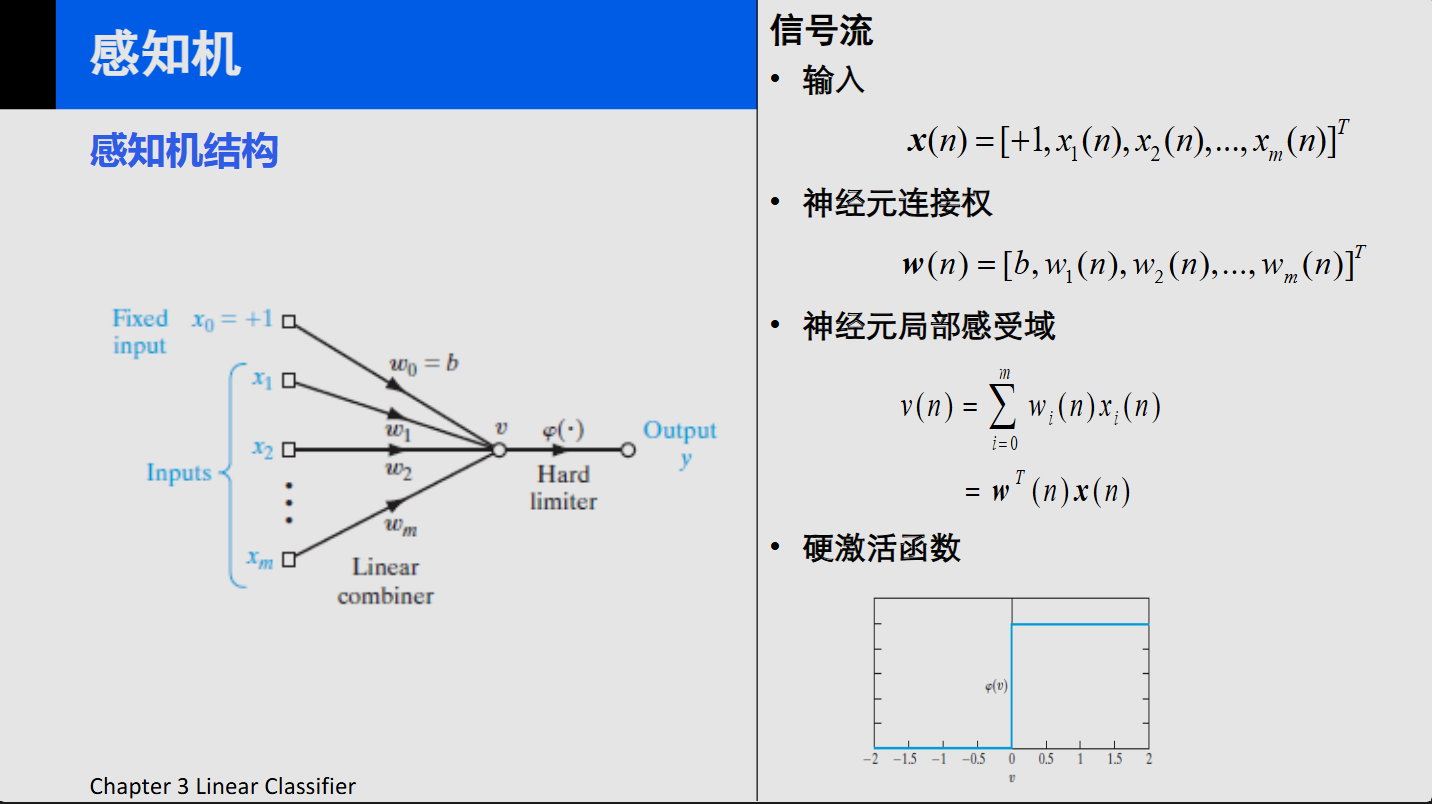


# 感知机算法实现解读

## 解决的问题
这段代码实现了一个**简单的二分类线性分类器**——感知机，用于解决**线性可分的二分类问题**。它能够自动从数据中学习到一个决策边界，将不同类别的数据点分开。

## 核心思想
基于**错误驱动学习**的原则：
- 初始化一个随机的决策超平面
- 遍历训练数据，只关注被错误分类的样本
- 当发现分类错误时，调整决策边界的方向，使其更接近正确分类
- 重复这个过程直到所有样本都被正确分类或达到最大迭代次数

## 算法特点
1. **简单高效**：只需基本的线性代数运算
2. **在线学习**：可以逐个样本处理，适合流式数据
3. **保证收敛**：对于线性可分数据，能在有限步内收敛
4. **直观易懂**：权重更新规则有清晰的几何解释

## 应用场景
- 简单的文本分类（垃圾邮件检测）
- 图像二分类（猫 vs 狗）
- 任何线性可分的模式识别任务

这个实现展示了机器学习中最基础的"从错误中学习"的概念，是理解更复杂神经网络模型的重要基础。

Training started
iteration1:Loss = 44
iteration2:Loss = 16
iteration3:Loss = 28
iteration4:Loss = 18
iteration5:Loss = 16
iteration6:Loss = 18
iteration7:Loss = 10
iteration8:Loss = 8
iteration9:Loss = 8
iteration10:Loss = 8
iteration11:Loss = 24
iteration12:Loss = 20
iteration13:Loss = 12
iteration14:Loss = 18
iteration15:Loss = 18
iteration16:Loss = 0
Perfect classification！


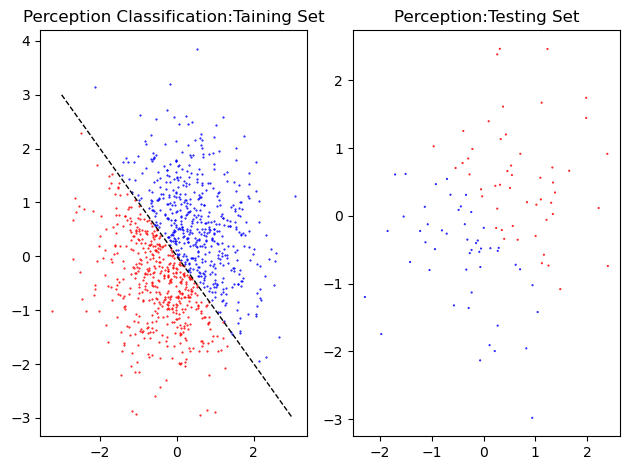

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def perception_tain(X, y, Learning_rate = 0.1, max_iters = 100):
    '''
    感知机训练：输入为训练集数据，输出为权重向量。
    通过梯度下降法实现。
    '''
    X_with_bias = np.column_stack([np.ones(X.shape[0]), X]) # X是所有样本的所有特征（num_sample * num_eigent），添加偏置是对每一个数据加入一个恒定的1，变为(num_sample * (num_eigent+1))
    weight = np.zeros(X_with_bias.shape[1]) # 权重反正都是要优化的参数，就没有必要先设定b或者w哪个在前。偏置向量是对每个样本的特征求内积再求和的，其维数等于样本特征维数+1（偏置项）

    print("Training started")
    for iter in range(max_iters):
        total_err = 0 # 初始化损失函数
        for i in range(len(X)):
            # 循环内计算损失，然后用梯度下降更新权重
            score = np.dot(weight, X_with_bias[i])
            prediction = 1 if score >0 else -1 # 感知机的预测标签

            # 根据感知机的预测结果和训练集的标签更新权重
            if prediction != y[i]:
                weight += Learning_rate*y[i]*X_with_bias[i] #这里学习率外就是损失函数对权重向量的导数
                total_err += 1 # 这里损失函数就等价于被错分的对象，所以比较简单
            
        print(f'iteration{iter + 1}:Loss = {total_err}')

        if total_err == 0:
            print("Perfect classification！")
            break
    return weight
    
def perception_predict(X, weight):
    X_with_bias = np.column_stack([np.ones(X.shape[0]), X])
    predictions = []

    for i in range(len(X)):
        score = np.dot(weight, X_with_bias[i])
        prediction = 1 if score >0 else -1
        predictions.append(prediction)
    return np.array(predictions) # 返回预测标签

np.random.seed(42)
X = np.random.randn(1000, 2)
y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)

np.random.seed(10)
test_data = np.random.randn(100, 2)
weight_trained = perception_tain(X, y)
predictions = perception_predict(test_data, weight_trained)

# Visualization
plt.figure()

plt.subplot(1, 2, 1)
plt.scatter(X[y==1, 0], X[y==1, 1], color = 'blue', label = '+1 Type', marker='.', s = 1)
plt.scatter(X[y==-1, 0], X[y==-1, 1], color = 'red', label = '-1 Type', marker='.', s = 1)

x_plot = np.linspace(-3, 3, 100)
if weight_trained[2] != 0:
    y_plot = (-weight_trained[0] - weight_trained[1]*x_plot)/weight_trained[2]
    plt.plot(x_plot, y_plot, 'k--', linewidth = 1)

plt.title('Perception Classification:Taining Set')

plt.subplot(1, 2, 2)
plt.scatter(test_data[:, 0], test_data[:, 1], c=predictions, cmap='bwr', marker='.', s=1)
plt.title('Perception:Testing Set')
plt.tight_layout()
plt.show()
